In [1]:
import scanpy as sc
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
import tools.rapids_modified as rp

In [3]:
adata = sc.read("/gstore/data/dld1_concerto/scTE/NGS5400_MouseAKPS/raw_qc.h5ad") 

In [4]:
adata

AnnData object with n_obs × n_vars = 24983 × 32285
    obs: 'Sample', 'Barcode', 'DemuxType_hashing', 'DemuxAssignment_hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'qc_pass', 'S_score', 'G2M_score', 'phase'
    var: 'ID', 'Symbol', 'Type', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: '.internal', 'adt_summary', 'genome', 'modality', 'uid', 'uns_dict'
    layers: 'counts'

In [5]:
adata.obs

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,qc_pass,S_score,G2M_score,phase
SAM24438240_rep1-AAACCCAAGGCCACTC,SAM24438240_rep1,AAACCCAAGGCCACTC,singlet,AKPScontrolorganoid_DMSO,3982,12899,738,5.721374,2988,23.164586,True,-0.745000,-0.608187,G1
SAM24438240_rep1-AAACCCACACCTGAAT,SAM24438240_rep1,AAACCCACACCTGAAT,singlet,AKPSFULLAPCorganoid_TNKi2uM,6678,34061,1247,3.661079,5683,16.684771,True,0.119669,4.974659,G2M
SAM24438240_rep1-AAACCCATCACAATGC,SAM24438240_rep1,AAACCCATCACAATGC,singlet,AKPScontrolorganoid_TNKi2uM,4556,16844,1064,6.316789,4362,25.896462,True,-0.285036,-1.048733,G1
SAM24438240_rep1-AAACCCATCAGCTTCC,SAM24438240_rep1,AAACCCATCAGCTTCC,singlet,AKPScontrolorganoid_TNKi2uM,5355,18123,1002,5.528886,2818,15.549302,True,0.613330,-0.875244,S
SAM24438240_rep1-AAACCCATCCACGGAC,SAM24438240_rep1,AAACCCATCCACGGAC,singlet,AKPSMutAPCorganoid_DOX,2766,10175,647,6.358722,2271,22.319410,True,-1.029426,-0.922027,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24438240_rep3-TTTGGTTTCTGTTGGA,SAM24438240_rep3,TTTGGTTTCTGTTGGA,singlet,AKPSFULLAPCorganoid_DMSO,2098,4454,452,10.148181,786,17.647059,True,-0.236897,0.262183,G2M
SAM24438240_rep3-TTTGTTGCACCTCTGT,SAM24438240_rep3,TTTGTTGCACCTCTGT,singlet,AKPSFULLAPCorganoid_DMSO,2333,5223,243,4.652499,1125,21.539345,True,-0.425927,-0.316764,G1
SAM24438240_rep3-TTTGTTGCATTGGCAT,SAM24438240_rep3,TTTGTTGCATTGGCAT,singlet,AKPSFULLAPCorganoid_DOX,3893,12156,627,5.157947,1735,14.272787,True,-0.939454,-0.931774,G1
SAM24438240_rep3-TTTGTTGGTGCAATAA,SAM24438240_rep3,TTTGTTGGTGCAATAA,singlet,AKPSMutAPCorganoid_DMSO,5933,24085,1554,6.452149,3893,16.163587,True,-2.077700,0.171540,G2M


## Add scTE data to the adata.obs

In [6]:
df = pd.read_csv("/gstore/data/dld1_concerto/scTE/NGS5400_MouseAKPS/scTE.csv", index_col=0)

In [7]:
df

,(CATTC)n,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610010F05Rik,0610010K14Rik,0610012D04Rik,0610012G03Rik,...,n-R5s92,n-R5s93,n-R5s94,n-R5s95,n-R5s96,n-R5s97,n-R5s98,n-TSaga9,n-TStga1,nhAT5a_ML
SAM24438240_rep1-AAACCCAAGGCCACTC,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCACACCTGAAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCATCACAATGC,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCATCAGCTTCC,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCATCCACGGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24438240_rep3-TTTGGTTTCTGTTGGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep3-TTTGTTGCACCTCTGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep3-TTTGTTGCATTGGCAT,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep3-TTTGTTGGTGCAATAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.loc['total'] = df.sum(numeric_only=True, axis=0)

In [9]:
df.loc['total'].sort_values(ascending=False).head(10)

mt-Atp6       3316386.0
CT010467.1    2994548.0
B1_Mus1       2858074.0
mt-Co3        2772157.0
B3            2756269.0
mt-Co2        2612414.0
mt-Rnr2       2607428.0
B2_Mm2        2601474.0
mt-Co1        2556947.0
B1_Mus2       2473191.0
Name: total, dtype: float64

In [10]:
merged_df = adata.obs.join(df, how='left')

In [11]:
merged_df

,Sample,Barcode,DemuxType_hashing,DemuxAssignment_hashing,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,n-R5s92,n-R5s93,n-R5s94,n-R5s95,n-R5s96,n-R5s97,n-R5s98,n-TSaga9,n-TStga1,nhAT5a_ML
SAM24438240_rep1-AAACCCAAGGCCACTC,SAM24438240_rep1,AAACCCAAGGCCACTC,singlet,AKPScontrolorganoid_DMSO,3982,12899,738,5.721374,2988,23.164586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCACACCTGAAT,SAM24438240_rep1,AAACCCACACCTGAAT,singlet,AKPSFULLAPCorganoid_TNKi2uM,6678,34061,1247,3.661079,5683,16.684771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCATCACAATGC,SAM24438240_rep1,AAACCCATCACAATGC,singlet,AKPScontrolorganoid_TNKi2uM,4556,16844,1064,6.316789,4362,25.896462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCATCAGCTTCC,SAM24438240_rep1,AAACCCATCAGCTTCC,singlet,AKPScontrolorganoid_TNKi2uM,5355,18123,1002,5.528886,2818,15.549302,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep1-AAACCCATCCACGGAC,SAM24438240_rep1,AAACCCATCCACGGAC,singlet,AKPSMutAPCorganoid_DOX,2766,10175,647,6.358722,2271,22.319410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM24438240_rep3-TTTGGTTTCTGTTGGA,SAM24438240_rep3,TTTGGTTTCTGTTGGA,singlet,AKPSFULLAPCorganoid_DMSO,2098,4454,452,10.148181,786,17.647059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep3-TTTGTTGCACCTCTGT,SAM24438240_rep3,TTTGTTGCACCTCTGT,singlet,AKPSFULLAPCorganoid_DMSO,2333,5223,243,4.652499,1125,21.539345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep3-TTTGTTGCATTGGCAT,SAM24438240_rep3,TTTGTTGCATTGGCAT,singlet,AKPSFULLAPCorganoid_DOX,3893,12156,627,5.157947,1735,14.272787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SAM24438240_rep3-TTTGTTGGTGCAATAA,SAM24438240_rep3,TTTGTTGGTGCAATAA,singlet,AKPSMutAPCorganoid_DMSO,5933,24085,1554,6.452149,3893,16.163587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
adata.obs= merged_df.copy()

## UMAP Visualization

In [13]:
RP = rp.RapidsSingleCellPipeline(adata)

In [14]:
RP.proc(2000, norm=True, scale=True, regress=False, embedding=True,
                 n_components=50, n_neighbors=10, knn_n_pcs=30, batch_key=None, filtered= False)

Filtering cells.
Processed 0 cells..
Filtering genes and normalizing data.
Filtering to highly variable genes.
Processed 0 genes..
Processed 1200 genes..
Processed 2400 genes..
Processed 3600 genes..
Processed 4800 genes..
Processed 6000 genes..
Processed 7200 genes..
Processed 8400 genes..
Processed 9600 genes..
Processed 10800 genes..
Processed 12000 genes..
Processed 13200 genes..
Processed 14400 genes..
Processed 15600 genes..
Processed 16800 genes..
Processed 18000 genes..
Processed 19200 genes..
Processed 20400 genes..
Processed 21600 genes..
Completed preprocessing.
Converting sparse GPU array to dense GPU array.
Preprocessing took 79.99980902671814 seconds
scaling
scaling took 0.694068431854248 seconds
computing PCA
PCA took 9.482283353805542 seconds
kNN took 7.123076438903809 seconds
computing UMAP
UMAP took 1.3853564262390137 seconds
computing Leiden clustering
Leiden clustering took 0.17704415321350098 seconds


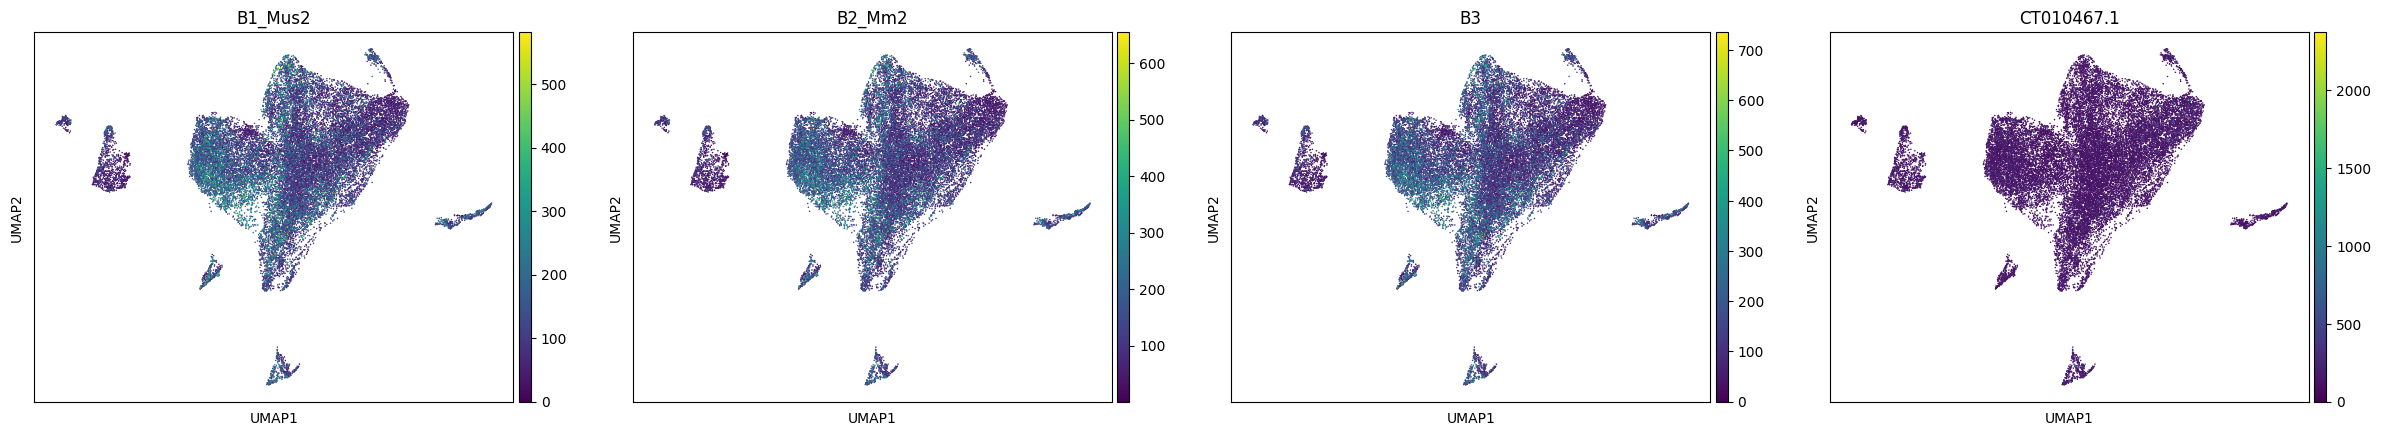

In [16]:
sc.pl.umap(RP.adata, color=['B1_Mus2','B2_Mm2','B3','CT010467.1'], cmap=plt.get_cmap('viridis'))

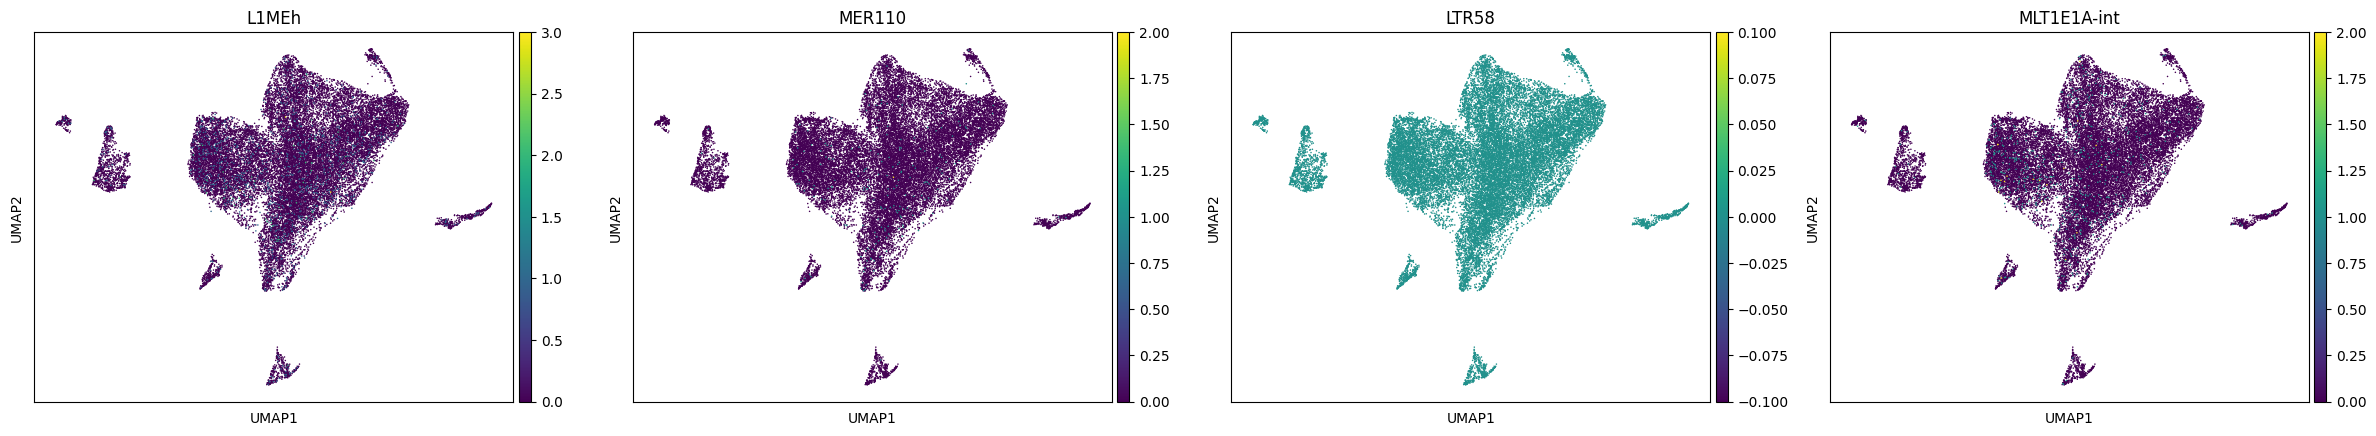

In [18]:
sc.pl.umap(RP.adata, color=['L1MEh','MER110','LTR58','MLT1E1A-int'], cmap=plt.get_cmap('viridis'))

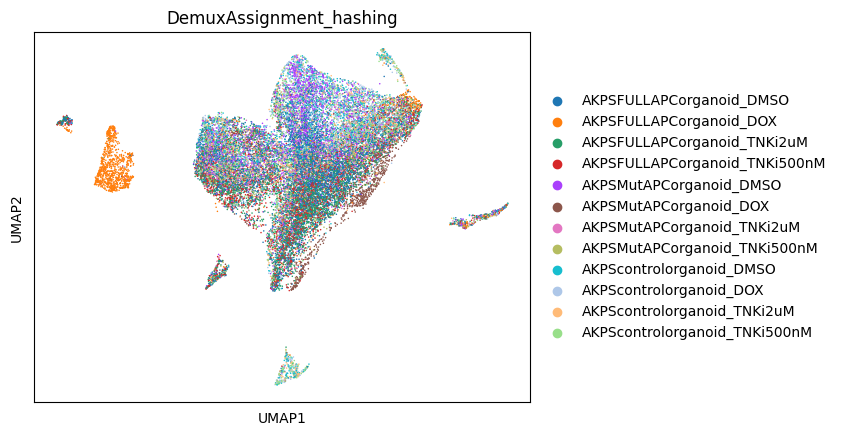

In [17]:
sc.pl.umap(RP.adata, color="DemuxAssignment_hashing")